In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
import os

# Verificar el directorio actual
print("Directorio actual:", os.getcwd())

# Listar archivos en el directorio actual
print("Archivos en el directorio:", os.listdir())


Directorio actual: c:\Users\ivan\Documents\pf\emision_CO2_contaminacion_sonora
Archivos en el directorio: ['.~lock.Data-Dictionary-Air_Quality_2024.xlsx#', 'aireCO2.csv', 'contaminacion_Sonora.csv', 'Data-Dictionary-Air_Quality_2024.xlsx', 'eda_contaminacion.ipynb', 'mapa_contaminacion_sonora.html']


In [5]:
data_cs = pd.read_csv("contaminacion_Sonora.csv")

In [6]:
data_cs.head(1)

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,test,0,00_026884.wav,-6,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,1,0,-1,-1,-1,-1,-1


In [7]:
columnas_deseadas = [
    'split', 'sensor_id', 'annotator_id', 'borough', 'block',
    'latitude', 'longitude', 'year', 'week',
    '1_engine_presence', '2_machinery-impact_presence', '3_non-machinery-impact_presence'
]
data_m = data_cs[columnas_deseadas]


In [8]:
data_m.head(1)

,split,sensor_id,annotator_id,borough,block,latitude,longitude,year,week,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence
0,test,0,-6,1,547,40.72951,-73.99388,2019,43,-1,1,0


Renombramos las columnas

In [9]:
data_m.rename(columns={
    '1_engine_presence': 'engine_presence',
    '2_machinery-impact_presence': 'machinery-impact_presence',
    '3_non-machinery-impact_presence': 'non-machinery-impact_presence'
}, inplace=True)

C:\Users\ivan\AppData\Local\Temp\ipykernel_16224\3231958874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m.rename(columns={


In [10]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62022 entries, 0 to 62021
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   split                          62022 non-null  object 
 1   sensor_id                      62022 non-null  int64  
 2   annotator_id                   62022 non-null  int64  
 3   borough                        62022 non-null  int64  
 4   block                          62022 non-null  int64  
 5   latitude                       62022 non-null  float64
 6   longitude                      62022 non-null  float64
 7   year                           62022 non-null  int64  
 8   week                           62022 non-null  int64  
 9   engine_presence                62022 non-null  int64  
 10  machinery-impact_presence      62022 non-null  int64  
 11  non-machinery-impact_presence  62022 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usag

Recortamos el dataset desde el año 2017 al 2024

In [11]:
data_m['year'] = pd.to_numeric(data_m['year'], errors='coerce')

data_filtrada = data_m[(data_m['year'] >= 2017) & (data_m['year'] <= 2024)]

# filas recortadas
print(f"Filas originales: {len(data_m)}")
print(f"Filas después del recorte: {len(data_filtrada)}")
print(f"Porcentaje recortado: {(1 - len(data_filtrada) / len(data_m)) * 100:.2f}%")


Filas originales: 62022
Filas después del recorte: 59542
Porcentaje recortado: 4.00%


C:\Users\ivan\AppData\Local\Temp\ipykernel_16224\1133696432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_m['year'] = pd.to_numeric(data_m['year'], errors='coerce')


In [12]:
data_m.head(2)

,split,sensor_id,annotator_id,borough,block,latitude,longitude,year,week,engine_presence,machinery-impact_presence,non-machinery-impact_presence
0,test,0,-6,1,547,40.72951,-73.99388,2019,43,-1,1,0
1,test,0,-4,1,547,40.72951,-73.99388,2019,43,1,-1,-1


In [22]:
# Sumar los ruidos por sensor
ruido_por_sensor = data_m.groupby('sensor_id')[['engine_presence', 'machinery-impact_presence', 'non-machinery-impact_presence']].sum()

ruido_por_sensor['total_ruidos'] = ruido_por_sensor.sum(axis=1)

ruido_por_sensor = ruido_por_sensor.sort_values(by='total_ruidos', ascending=False)

#5 sensores con mayor ruido
top_5_ruido = ruido_por_sensor.head(5)

# 5 sensores con menor ruido
bottom_5_ruido = ruido_por_sensor.tail(5)

print("Los 5 sensores con mayor presencia de ruidos:")
print(top_5_ruido)

print("\nLos 5 sensores con menor presencia de ruidos:")
print(bottom_5_ruido)

Los 5 sensores con mayor presencia de ruidos:
           engine_presence  machinery-impact_presence  \
sensor_id                                               
40                    1311                        907   
27                     691                        395   
2                      836                         54   
34                     666                         85   
16                     693                        -36   

           non-machinery-impact_presence  total_ruidos  
sensor_id                                               
40                                   181          2399  
27                                    60          1146  
2                                      1           891  
34                                   -17           734  
16                                   -60           597  

Los 5 sensores con menor presencia de ruidos:
           engine_presence  machinery-impact_presence  \
sensor_id                                          

In [21]:
# Filtrar el DataFrame para el sensor_id 40
sensor_40 = data_m[data_m['sensor_id'] == 40]

# Obtener el borough del sensor
borough_40 = sensor_40['borough'].unique()

print(f"El borough para el sensor_id 40 es: {borough_40}")



El borough para el sensor_id 40 es: [1]


In [24]:
sensor_50 = data_m[data_m['sensor_id'] == 50]
borough_50 = sensor_50['borough'].unique()

print(f"El borough para el sensor_id 50 es: {borough_50}")

El borough para el sensor_id 50 es: [3]


Obtenemos que la zona con mayor ruido historicamente es Manhattan y la de menor ruido es Brooklyn

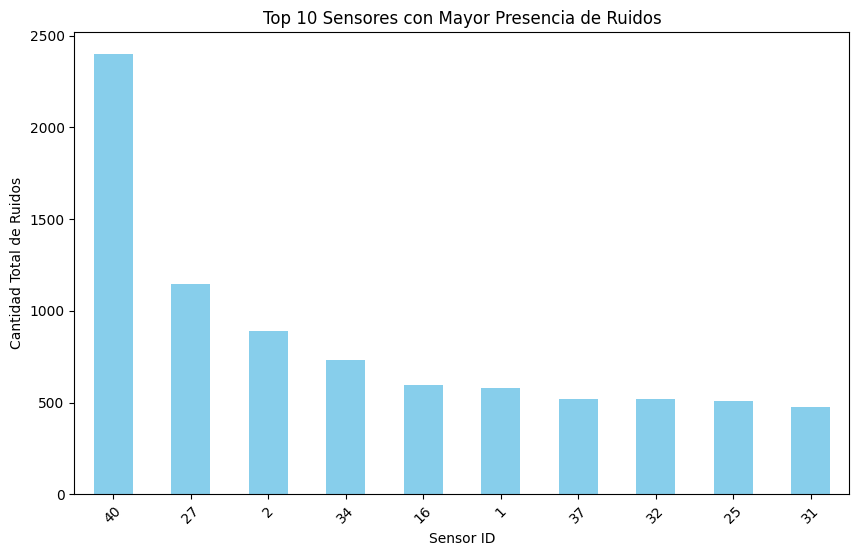

In [19]:
# Top 10 sensores con más ruidos presentes
top_sensores = ruido_por_sensor.head(10)

# Crear gráfico de barras
top_sensores['total_ruidos'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Sensores con Mayor Presencia de Ruidos')
plt.xlabel('Sensor ID')
plt.ylabel('Cantidad Total de Ruidos')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x
plt.show()

In [27]:
ruido_por_sensor.head(10)

,engine_presence,machinery-impact_presence,non-machinery-impact_presence,total_ruidos
sensor_id,,,,
40,1311,907,181,2399
27,691,395,60,1146
2,836,54,1,891
34,666,85,-17,734
16,693,-36,-60,597
1,552,-15,40,577
37,333,143,44,520
32,419,59,41,519
25,447,82,-20,509


In [28]:
data_m.to_csv('data_contaminacion_sonora.csv', index=False)

ruido_por_sensor.to_csv('ruido_por_sensor_total.csv', index=False)
